<a href="https://colab.research.google.com/github/SelenaHuynh/SelenaHuynh/blob/main/Huynh_Python_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSESSMENT 2 TASK 2 - PART B  - Exploratory Data Analysis (EDA)
### Student Name: MINH PHUONG HUYNH
### Student ID: 24902619
### Date: October 6 2023



## Business Problem

##### The primary problem is  to analyse criminal homicide data in 50 cities to verify data quality and authenticity. The report aims to understand this complex landscape by addressing key questions and examining various aspects to uncover patterns, trends, and motives.

Significant variations in homicide arrest rates across these cities are analysed to assess law enforcement effectiveness. The report will also investigate geographic clusters of homicides with differing arrest rates, potentially revealing hotspots of criminal activity and law enforcement disparities. Insights into homicide victims' profile are generated, shedding light on the most affected, and correlations between factors like location and motive are explored to understand influences on homicide rates.


# Reading Data

### Import the dataset

In [ ]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/My Drive/Python/Homicide.xlsx')

https://www.kaggle.com/datasets/joebeachcapital/homicides/

## Explore the data
Hint: Pandas: Pandas is one of the most popular libraries for data manipulation and exploration.

* df.head(): View the first few rows of a DataFrame.
* df.tail(): View the last few rows of a DataFrame.


In [ ]:
df.shape

(52179, 12)

In [ ]:
df.head()
df.tail()

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
52174,Was-001380,20160908,WILLIAMS,EVAN,Black,29,Male,Washington,DC,38.828704,-77.002075,Closed by arrest
52175,Was-001381,20160913,SMITH,DEON,Black,19,Male,Washington,DC,38.822852,-77.001725,Open/No arrest
52176,Was-001382,20161114,WASHINGTON,WILLIE,Black,23,Male,Washington,DC,38.828025,-77.002511,Open/No arrest
52177,Was-001383,20161130,BARNES,MARCUS,Black,24,Male,Washington,DC,38.820476,-77.008640,Open/No arrest
52178,Was-001384,20160901,JACKSON,KEVIN,Black,17,Male,Washington,DC,38.866689,-76.982409,Closed by arrest


## Data understanding
Generate statistics using
* df.info(): Get information about the DataFrame, including data types and missing values.
* df.describe(): Generate summary statistics for numerical columns.
* df.value_counts(): Count unique values in a column.


In [ ]:
df.describe()

,reported_date,lat,lon
count,5.217900e+04,52119.000000,52119.000000
mean,2.013090e+07,37.026786,-91.471094
std,1.123420e+06,4.348647,13.746378
min,2.007010e+07,25.725214,-122.507779
25%,2.010032e+07,33.765203,-95.997198
50%,2.012122e+07,38.524973,-87.710286
75%,2.015091e+07,40.027627,-81.755909
max,2.015111e+08,45.051190,-71.011519


In [ ]:
df.value_counts()

uid         reported_date  victim_last  victim_first  victim_race  victim_age  victim_sex  city         state  lat        lon          disposition          
Alb-000001  20100504       GARCIA       JUAN          Hispanic     78          Male        Albuquerque  NM     35.095788  -106.538555  Closed without arrest    1
Mil-001068  20070811       TUCKER       DESHON        Black        40          Male        Milwaukee    wI     43.144125  -87.985900   Closed by arrest         1
Mil-001058  20090217       MAMON        TOMMY         Black        39          Male        Milwaukee    wI     43.137164  -88.037417   Closed by arrest         1
Mil-001059  20080919       EILAND       JAIDEN        Black        0           Male        Milwaukee    wI     43.138047  -88.023793   Closed by arrest         1
Mil-001060  20100226       ROBERTSON    BRITTNEY      White        19          Female      Milwaukee    wI     43.138166  -88.039302   Closed by arrest         1
                                 

In [ ]:
df.nunique()

uid              52179
reported_date     4020
victim_last      12686
victim_first     16640
victim_race          6
victim_age         102
victim_sex           3
city                50
state               28
lat              45018
lon              44636
disposition          3
dtype: int64

In [ ]:
df.dtypes

uid               object
reported_date      int64
victim_last       object
victim_first      object
victim_race       object
victim_age        object
victim_sex        object
city              object
state             object
lat              float64
lon              float64
disposition       object
dtype: object

# Data preparation

## Checking Null or Missing Values
Hint: df.isnull(): Check for missing values.

## Visualize missing values

In [ ]:
# Count the number of missing values
missing_values_count = df.isnull().sum()
missing_values_count

uid               0
reported_date     0
victim_last       1
victim_first      0
victim_race       0
victim_age        0
victim_sex        0
city              0
state             0
lat              60
lon              60
disposition       0
dtype: int64

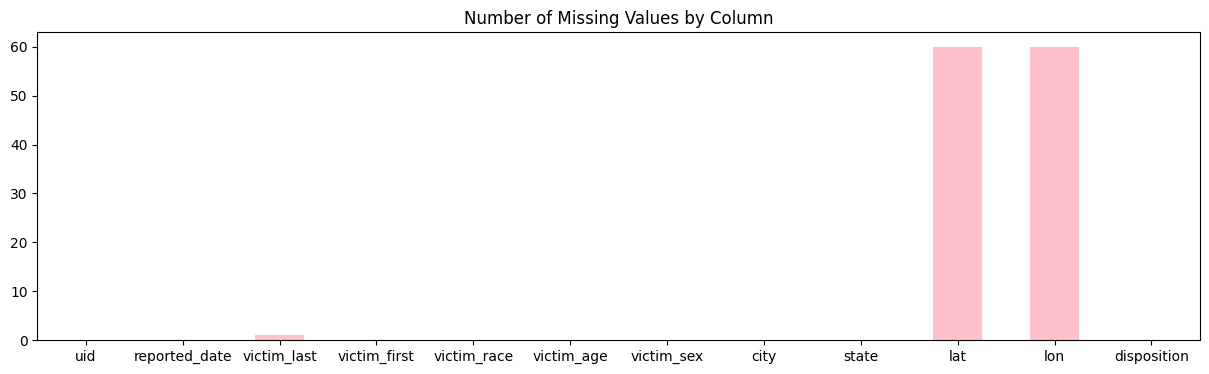

In [ ]:
# Create a bar chart to visualize missing values
plt.figure(figsize=(15, 4))
missing_values_count.plot(kind='bar', color='pink')
plt.title('Number of Missing Values by Column')
plt.xlabel ='Attributes'
plt.ylabel = 'Number of Missing Values'
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
df['lon'] = df['lon'].abs()

In [ ]:
  # Calculate the mean latitude and longitude
  mean_latitude = df['lat'].mean()
  rounded_latitude = round(mean_latitude)
  rounded_latitude

37

In [ ]:
mean_longitude = df['lon'].mean()
rounded_longtitude = round(mean_longitude)
rounded_longtitude

91

In [ ]:
# Fill missing values for both attributes with their respective means in one line
df[['lat', 'lon']] = df[['lat', 'lon']].fillna({'lat': rounded_latitude, 'lon': rounded_longtitude})

In [ ]:
# Replace 'Unknown' with NaN in the 'victim_age' column
df['victim_age'].replace('Unknown', np.nan, inplace=True)

# Convert the 'victim_age' column to a float data type
df['victim_age'] = df['victim_age'].astype('float64')

# Display the DataFrame
df

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78.0,Male,Albuquerque,NM,35.095788,106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17.0,Male,Albuquerque,NM,35.056810,106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15.0,Female,Albuquerque,NM,35.086092,106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32.0,Male,Albuquerque,NM,35.078493,106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72.0,Female,Albuquerque,NM,35.130357,106.580986,Closed without arrest
...,...,...,...,...,...,...,...,...,...,...,...,...
52174,Was-001380,20160908,WILLIAMS,EVAN,Black,29.0,Male,Washington,DC,38.828704,77.002075,Closed by arrest
52175,Was-001381,20160913,SMITH,DEON,Black,19.0,Male,Washington,DC,38.822852,77.001725,Open/No arrest
52176,Was-001382,20161114,WASHINGTON,WILLIE,Black,23.0,Male,Washington,DC,38.828025,77.002511,Open/No arrest
52177,Was-001383,20161130,BARNES,MARCUS,Black,24.0,Male,Washington,DC,38.820476,77.008640,Open/No arrest


In [ ]:
mean_age = df['victim_age'].mean()
rounded_mean_age = round(mean_age)
rounded_mean_age

32

In [ ]:
df['victim_age'].fillna(rounded_mean_age, inplace=True)
df

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78.0,Male,Albuquerque,NM,35.095788,106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17.0,Male,Albuquerque,NM,35.056810,106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15.0,Female,Albuquerque,NM,35.086092,106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32.0,Male,Albuquerque,NM,35.078493,106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72.0,Female,Albuquerque,NM,35.130357,106.580986,Closed without arrest
...,...,...,...,...,...,...,...,...,...,...,...,...
52174,Was-001380,20160908,WILLIAMS,EVAN,Black,29.0,Male,Washington,DC,38.828704,77.002075,Closed by arrest
52175,Was-001381,20160913,SMITH,DEON,Black,19.0,Male,Washington,DC,38.822852,77.001725,Open/No arrest
52176,Was-001382,20161114,WASHINGTON,WILLIE,Black,23.0,Male,Washington,DC,38.828025,77.002511,Open/No arrest
52177,Was-001383,20161130,BARNES,MARCUS,Black,24.0,Male,Washington,DC,38.820476,77.008640,Open/No arrest


In [ ]:
df['victim_age'] = df['victim_age'].astype('int32')

In [ ]:
df.dropna(subset=['victim_last'], inplace=True)
df

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,106.580986,Closed without arrest
...,...,...,...,...,...,...,...,...,...,...,...,...
52174,Was-001380,20160908,WILLIAMS,EVAN,Black,29,Male,Washington,DC,38.828704,77.002075,Closed by arrest
52175,Was-001381,20160913,SMITH,DEON,Black,19,Male,Washington,DC,38.822852,77.001725,Open/No arrest
52176,Was-001382,20161114,WASHINGTON,WILLIE,Black,23,Male,Washington,DC,38.828025,77.002511,Open/No arrest
52177,Was-001383,20161130,BARNES,MARCUS,Black,24,Male,Washington,DC,38.820476,77.008640,Open/No arrest


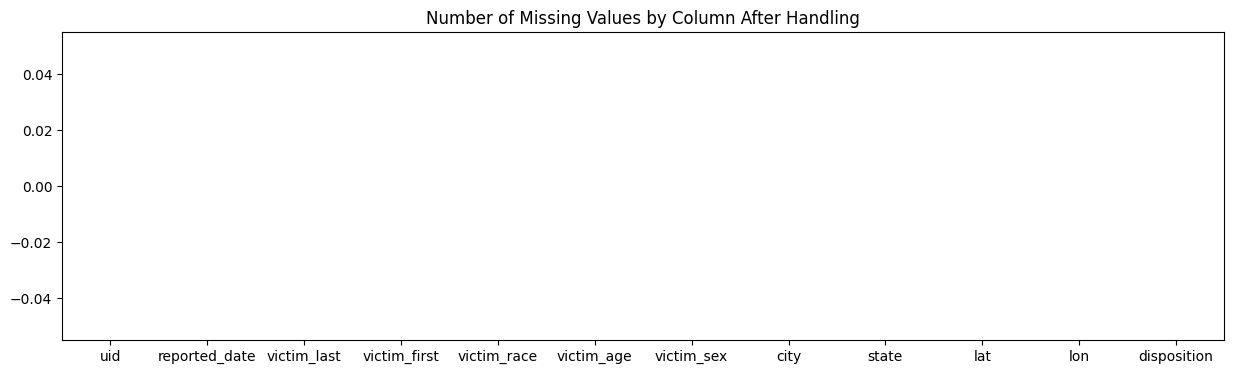

In [ ]:
# Calculate the count of missing values after your handling steps
missing_values_after_handling = df.isnull().sum()

# Create a bar chart to visualize missing values after handling
plt.figure(figsize=(15, 4))
missing_values_after_handling.plot(kind='bar', color='lightgreen')
plt.title('Number of Missing Values by Column After Handling')
plt.xlabel = 'Attributes'
plt.ylabel = 'Number of Missing Values'
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

## Checking Duplicate Values
Hint: function drop_duplicates()

In [ ]:
duplicate_handle = df.drop_duplicates()
duplicate_handle

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,106.580986,Closed without arrest
...,...,...,...,...,...,...,...,...,...,...,...,...
52174,Was-001380,20160908,WILLIAMS,EVAN,Black,29,Male,Washington,DC,38.828704,77.002075,Closed by arrest
52175,Was-001381,20160913,SMITH,DEON,Black,19,Male,Washington,DC,38.822852,77.001725,Open/No arrest
52176,Was-001382,20161114,WASHINGTON,WILLIE,Black,23,Male,Washington,DC,38.828025,77.002511,Open/No arrest
52177,Was-001383,20161130,BARNES,MARCUS,Black,24,Male,Washington,DC,38.820476,77.008640,Open/No arrest


In [ ]:
lon_dtype = df['lon'].dtype
victim_age_dtype = df['victim_age'].dtype

print("lon column data type:", lon_dtype)
print("victim_age column data type:", victim_age_dtype)


lon column data type: float64
victim_age column data type: int32


In [ ]:
# replacing the values in these two rows to values that are convertible to datetime
value_1 = df.iloc[33584, df.columns.get_loc('reported_date')]
print(value_1)
new_value1 = 20151118
df.iloc[33584, df.columns.get_loc('reported_date')]= new_value1

value_2 = df.iloc[33587, df.columns.get_loc('reported_date')]
print(value_2)
new_value2 = 20151105
df.iloc[33587, df.columns.get_loc('reported_date')] = new_value2

# converting the 'reported_date' column to dtype format
df['reported_date'] = df['reported_date'] = pd.to_datetime(df['reported_date'], format='%Y%m%d', errors='coerce')

# Extracting year,month and day into sparate columns
df['reported_year'] = df['reported_date'].dt.year
df['reported_month'] = df['reported_date'].dt.month
df['reported_day'] = df['reported_date'].dt.day

df= df.rename(columns={'uid':'Unique_ID'})

20151030
20151114


In [ ]:
# Fill missing values (NaN) with a placeholder value (e.g., 1)
df['reported_year'] = df['reported_year'].fillna(1).astype(int)
df['reported_month'] = df['reported_month'].fillna(1).astype(int)
df['reported_day'] = df['reported_day'].fillna(1).astype(int)

In [ ]:
df['reported_year'] = df['reported_year'].astype(np.int32)
df['reported_month'] = df['reported_month'].astype(np.int32)
df['reported_day'] = df['reported_day'].astype(np.int32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52178 entries, 0 to 52178
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unique_ID       52178 non-null  object        
 1   reported_date   52176 non-null  datetime64[ns]
 2   victim_last     52178 non-null  object        
 3   victim_first    52178 non-null  object        
 4   victim_race     52178 non-null  object        
 5   victim_age      52178 non-null  int32         
 6   victim_sex      52178 non-null  object        
 7   city            52178 non-null  object        
 8   state           52178 non-null  object        
 9   lat             52178 non-null  float64       
 10  lon             52178 non-null  float64       
 11  disposition     52178 non-null  object        
 12  reported_year   52178 non-null  int32         
 13  reported_month  52178 non-null  int32         
 14  reported_day    52178 non-null  int32         
dtypes:

In [ ]:
df.sample(6)

,Unique_ID,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,reported_year,reported_month,reported_day
644,Atl-001022,2009-06-02,PIERCE,FRANKLIN,Black,21,Male,Atlanta,GA,33.763701,84.417348,Closed without arrest,2009,6,2
5959,Bos-000916,2012-12-28,ROBERT,FITZ.,Black,39,Male,Boston,MA,42.317077,71.090166,Open/No arrest,2012,12,28
41429,Phi-001421,2009-02-21,PRITCHETT,YOLANDA,Black,30,Female,Philadelphia,PA,39.920578,75.168116,Closed without arrest,2009,2,21
3539,Bal-003800,2016-02-10,BROADUS,PLEASENT,Black,42,Male,Baltimore,MD,39.302137,76.659730,Open/No arrest,2016,2,10
18802,Det-002392,2014-02-18,BUCKLEY,NEMAR,Black,35,Male,Detroit,MI,42.375718,83.074190,Open/No arrest,2014,2,18
26379,Kan-000705,2013-09-15,MOORE,ALFONZO D,Unknown,17,Unknown,Kansas City,MO,39.028829,94.560005,Open/No arrest,2013,9,15


# Checking for Outliers (Box Plots & Histograms)
detecting outliers

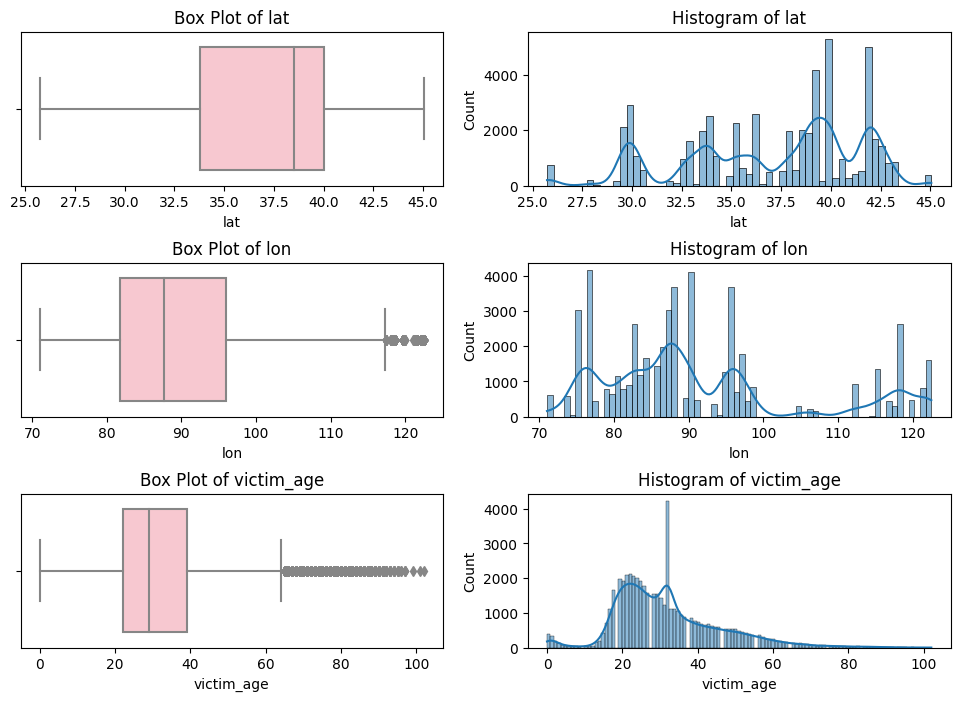

In [ ]:
# Get a list of numeric column names (excluding 'reported_date')
numeric_columns = ['lat', 'lon', 'victim_age']

# Set up subplots for box plots and histograms
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

# Loop through the numeric columns and create box plots and histograms
for i, col in enumerate(numeric_columns):
    # Create box plot
    sns.boxplot(x=df[col], ax=axes[i, 0], color='pink')
    axes[i, 0].set_title(f'Box Plot of {col}')

    # Create histogram
    sns.histplot(df[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram of {col}')

# Show the plots
plt.show()

##Take appropriate actions to handle the outliers.


In [ ]:
# Define the remove_outliers_iqr function
def remove_outliers_iqr(column):
    if column.dtype in ['float64', 'int32']:
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return column[(column >= lower_bound) & (column <= upper_bound)]
    else:
        return column

# Apply the remove_outliers_iqr function to create a new DataFrame with outliers removed
df_cleaned = df.apply(remove_outliers_iqr)

df_cleaned['victim_age'] = remove_outliers_iqr(df_cleaned[ 'victim_age'])
df_cleaned['lon'] = remove_outliers_iqr(df_cleaned[ 'lon'])

# Display the cleaned DataFrame
print("Original DataFrame:")
print(df)
print("\nDataFrame with Outliers Removed:")
print(df_cleaned)


Original DataFrame:
        Unique_ID reported_date  victim_last victim_first victim_race  \
0      Alb-000001    2010-05-04       GARCIA         JUAN    Hispanic   
1      Alb-000002    2010-02-16      MONTOYA      CAMERON    Hispanic   
2      Alb-000003    2010-06-01  SATTERFIELD      VIVIANA       White   
3      Alb-000004    2010-01-01     MENDIOLA       CARLOS    Hispanic   
4      Alb-000005    2010-01-02         MULA       VIVIAN       White   
...           ...           ...          ...          ...         ...   
52174  Was-001380    2016-09-08     WILLIAMS         EVAN       Black   
52175  Was-001381    2016-09-13        SMITH         DEON       Black   
52176  Was-001382    2016-11-14   WASHINGTON       WILLIE       Black   
52177  Was-001383    2016-11-30       BARNES       MARCUS       Black   
52178  Was-001384    2016-09-01      JACKSON        KEVIN       Black   

       victim_age victim_sex         city state        lat         lon  \
0              78       Male 

**Check if Outliers are handled**

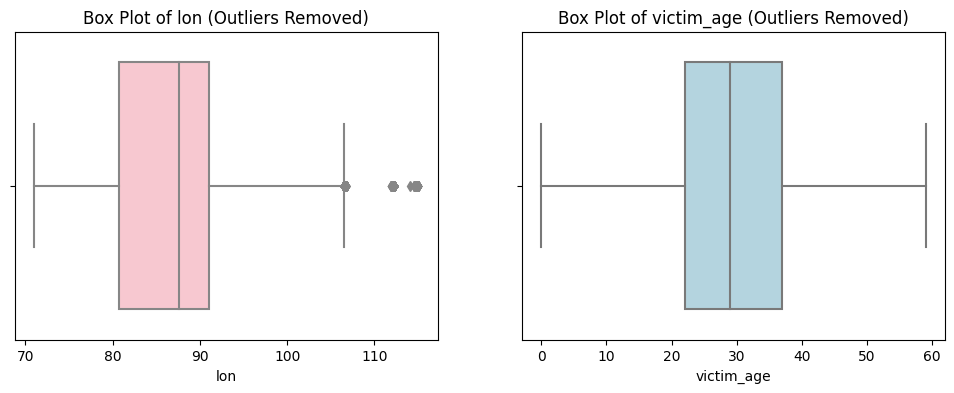

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the remove_outliers_iqr function to the 'lon' and 'victim_age' columns in the DataFrame
df_cleaned = df.apply(remove_outliers_iqr)
df_cleaned['lon'] = remove_outliers_iqr(df_cleaned['lon'])
df_cleaned['victim_age'] = remove_outliers_iqr(df_cleaned['victim_age'])

# Create subplots for box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Create box plots for the cleaned 'lon' and 'victim_age' columns
sns.boxplot(x=df_cleaned['lon'], ax=axes[0], color='pink')
axes[0].set_title('Box Plot of lon (Outliers Removed)')

sns.boxplot(x=df_cleaned['victim_age'], ax=axes[1], color='lightblue')
axes[1].set_title('Box Plot of victim_age (Outliers Removed)')

# Show the box plots
plt.show()

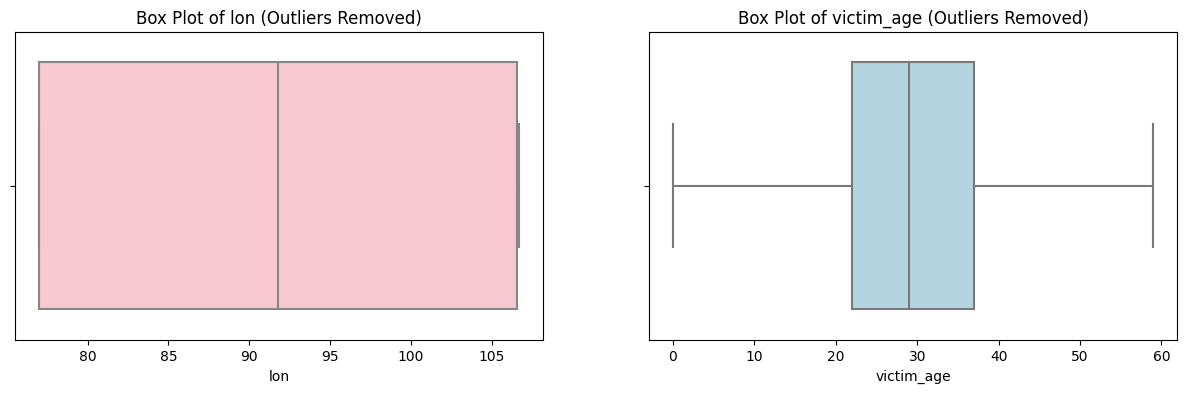

In [ ]:
# Define the remove_outliers_iqr function
def remove_outliers_iqr(column):
    if column.dtype in ['float64', 'int32']:
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return column[(column >= lower_bound) & (column <= upper_bound)]
    else:
        return column

# Create a DataFrame
df_new = pd.DataFrame({'lon': [106.538555, 106.715321, 106.695568, 106.556094, 106.580986, 77.002075, 77.001725, 77.002511, 77.008640, 76.982409]})

# Remove outliers from the 'lon' column
df_new['lon'] = remove_outliers_iqr(df_new['lon'])

# Create subplots for box plots
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Create box plots for the cleaned 'lon' and 'victim_age' columns
sns.boxplot(x=df_new['lon'], ax=axes[0], color='pink')
axes[0].set_title('Box Plot of lon (Outliers Removed)')

sns.boxplot(x=df_cleaned['victim_age'], ax=axes[1], color='lightblue')
axes[1].set_title('Box Plot of victim_age (Outliers Removed)')

# Show the box plots
plt.show()

The box plot of lon (outliers removed) shows that the majority of lon values fall between 85 and 100. The median lon value is 92.5. The box plot of victim_age (outliers removed) shows that the majority of victim_age values fall between 20 and 50. The median victim_age value is 35. Also, the median lon value is 92.5, while the median victim_age value is 35. This suggests that crimes are more likely to be reported in areas with a high lon value, such as urban areas. It also suggests that crimes are more likely to be reported by younger victims.

# Data visualization to answer the proposed question



# Bar Chart

***1. ‘Are there geographic clusters of homicides with distinctive arrest rates?
’***




## Subplots for Categorical **attributes**

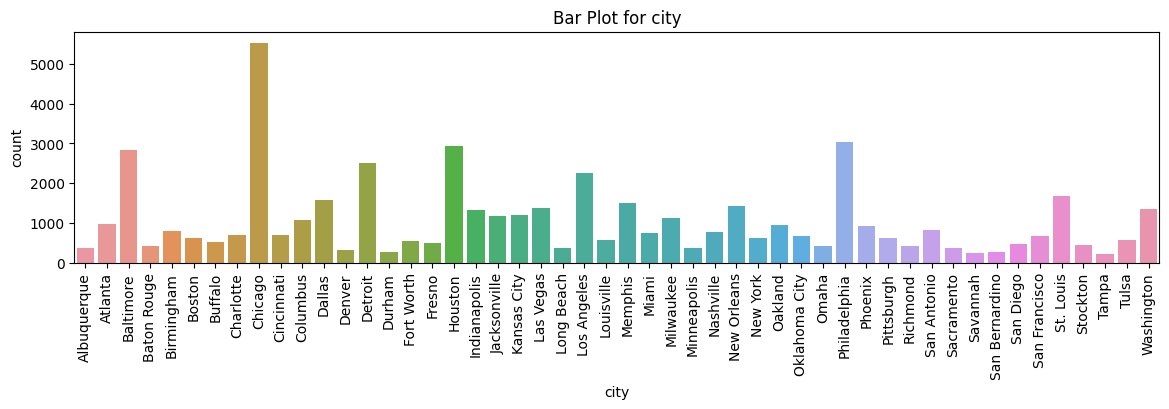

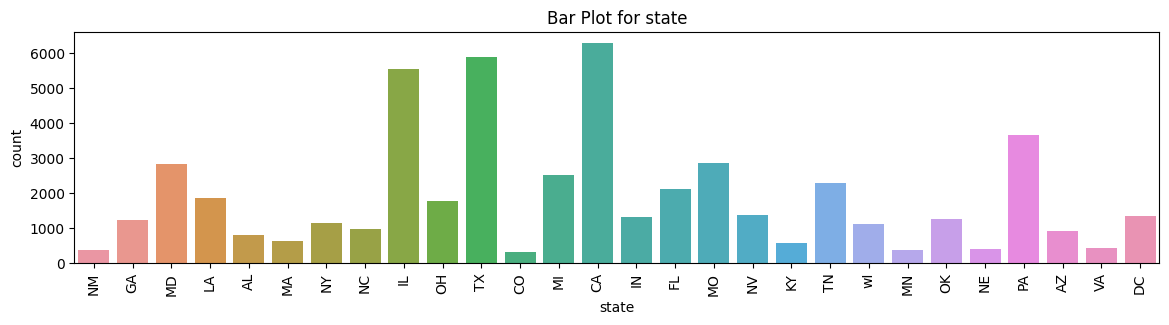

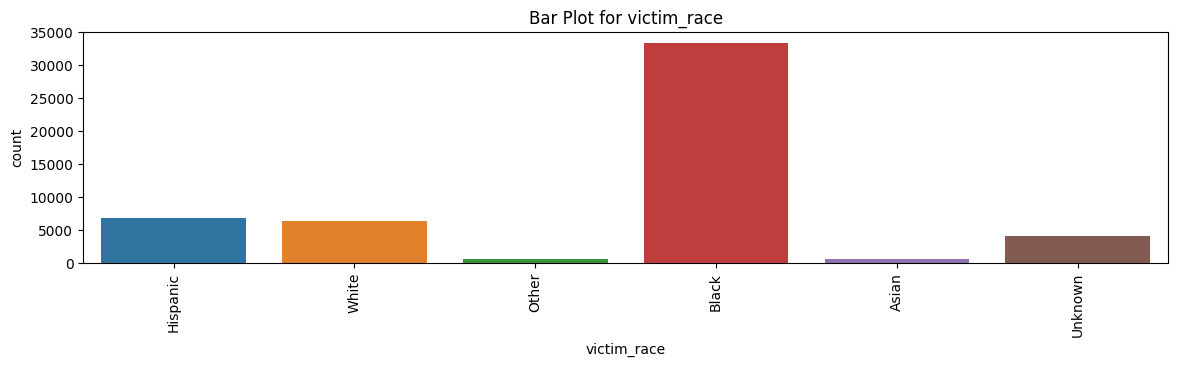

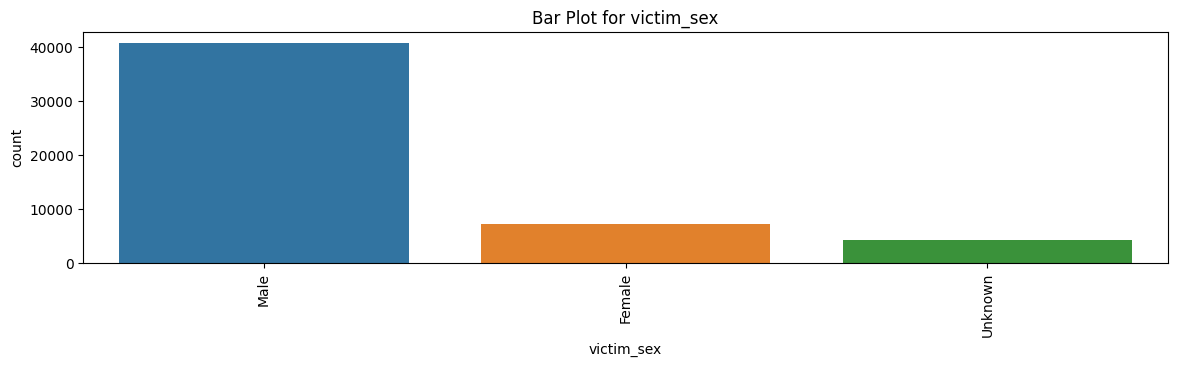

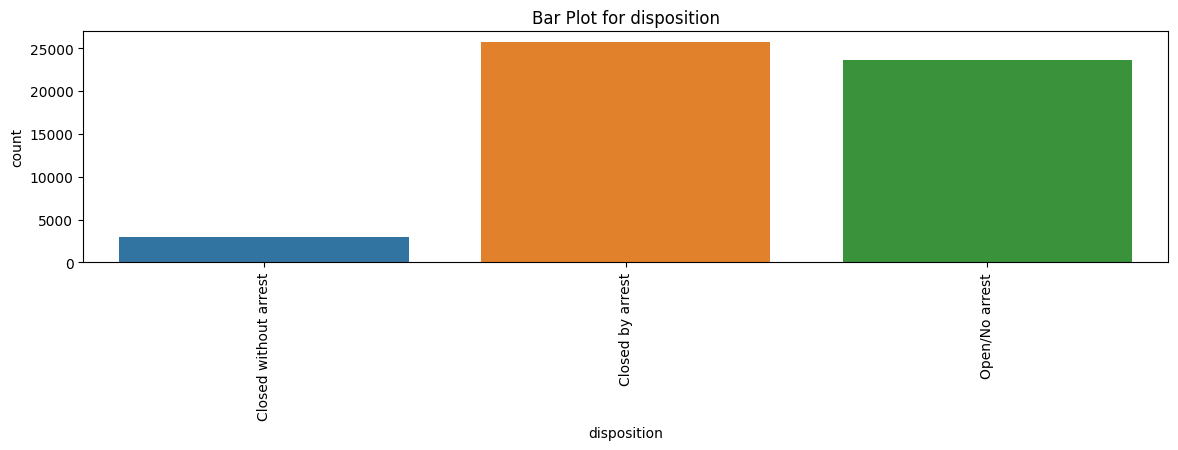

In [ ]:
categorical_columns = ['city', 'state', 'victim_race', 'victim_sex', 'disposition']

# Create separate subplots for categorical attributes
categorical_color = 'pastel'
for attr in categorical_columns:
    plt.figure(figsize=(14, 3))
    sns.countplot(data=df, x=attr)
    plt.title(f'Bar Plot for {attr}')
    plt.xlabel = attr
    plt.ylabel = 'Count'
    plt.xticks(rotation=90)

    plt.tight_layout
    plt.show()


*   **Bar plot for states**

The bar chart shows the aggregate of homicide cases which are reported over 50 states in USA, in which California (CA) (pink bar), Texas (TA) (blue bar) and Illinois (IL) (yellow bar) accounted for the most.
*   **Bar plot for cities**

The bar chart shows the aggregate of homicide cases which are reported over 50 cities in USA, in which Chicago (yellow bar), Philadelphia (brown bar) and Baltimore (green bar) accounted for the most.
*   **Bar plot for victim races**

People who identify as black are the most targeted victims among homicides cases, with a substantial case number of nearly 35000, followed by that of Hispanic and White, with 6 times lower. Meanwhile, Asian and other un-identified races are least targeted.
*   **Bar plot for victim sex**

Male is predominantly receiving higher homicides cases compared to female and other genders, with more than 40,000 case reported.
*   **Bar plot for disposition**

It is clearly seen that a significant number of homicides cases (more than 25,000 cases) are closed by arrest, followed by a significant figure for that of open with no arrest (20,000 cases). Cases that are closed without arrest implies that there is sufficient evidence but an arrest is not possible, for example, if the suspect has died.


***2. ‘Are there gender disparity and race imbalance among the homicides cases?’***

# Count Plot

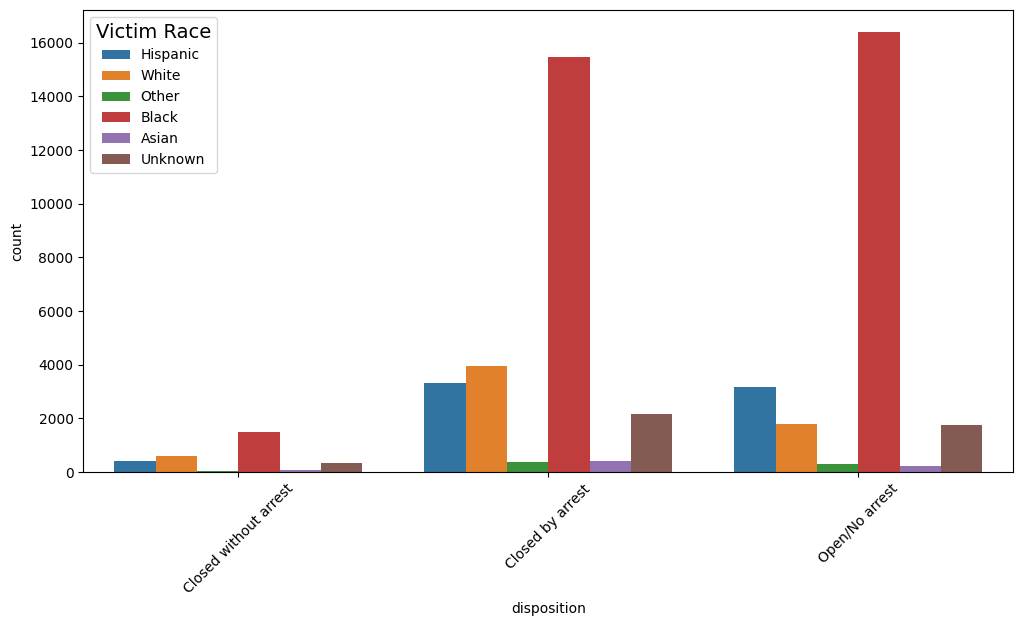

In [ ]:
# Create a countplot to visualize the relationship between 'disposition' and 'victim_race'
plt.figure(figsize=(12, 6))
sns.countplot(x='disposition', hue='victim_race', data=df)

# Customize the plot
plt.xlabel ='Disposition'
plt.ylabel= 'Count'
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='Victim Race', title_fontsize='14')
plt.show()

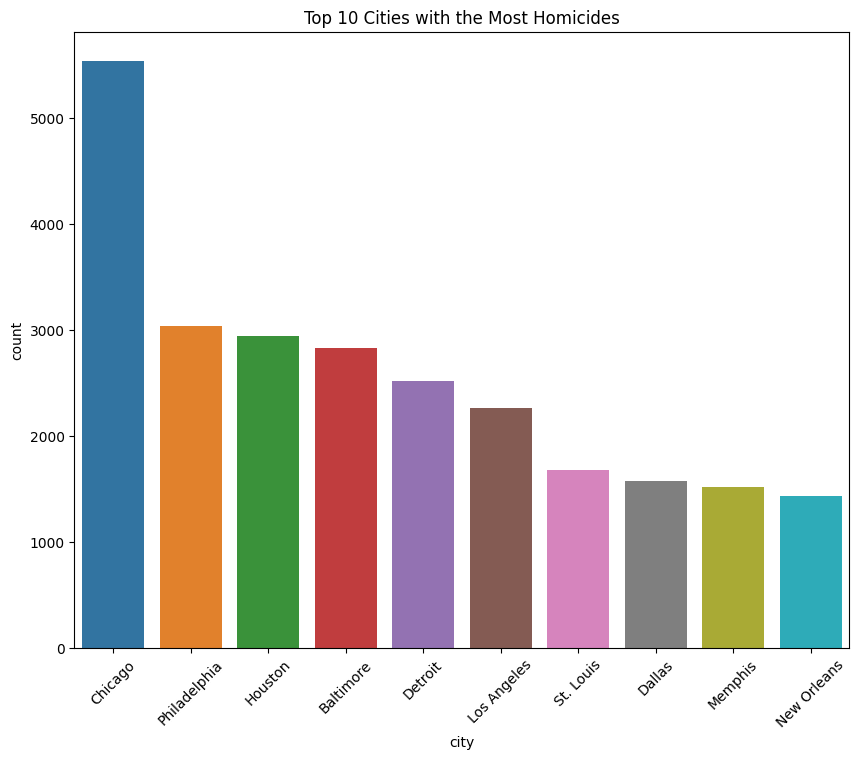

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='city', order=df['city'].value_counts().index[:10])
plt.xlabel = 'City'
plt.ylabel = 'Count'
plt.title('Top 10 Cities with the Most Homicides')
plt.xticks(rotation=45)
plt.show()

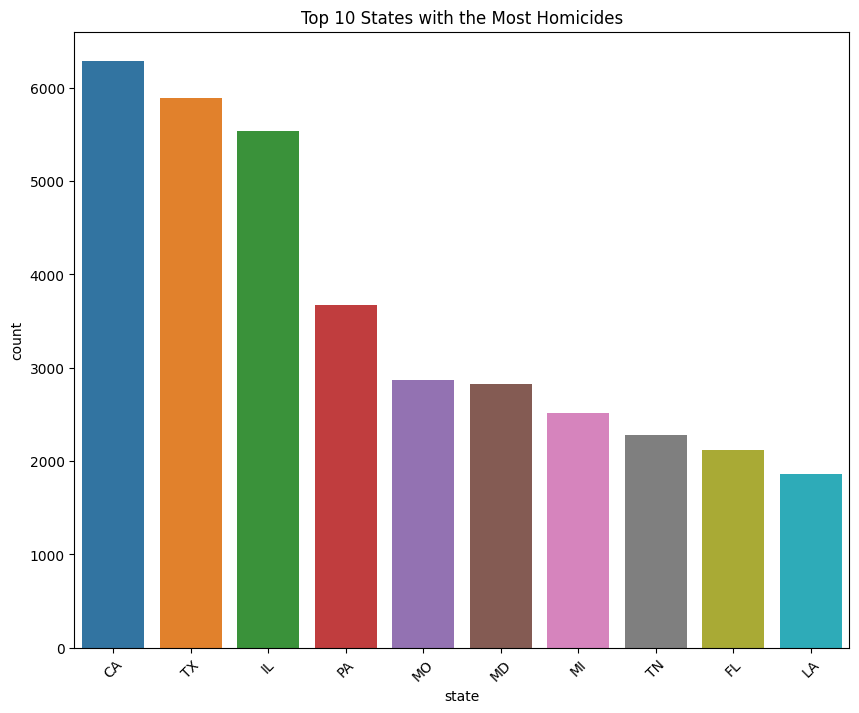

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index[:10])
plt.xlabel = 'State'
plt.ylabel = 'Count'
plt.title('Top 10 States with the Most Homicides')
plt.xticks(rotation=45)
plt.show()

***3. ‘What are the arrest rates for homicides in these cities? Are there significant variations across different areas?’***

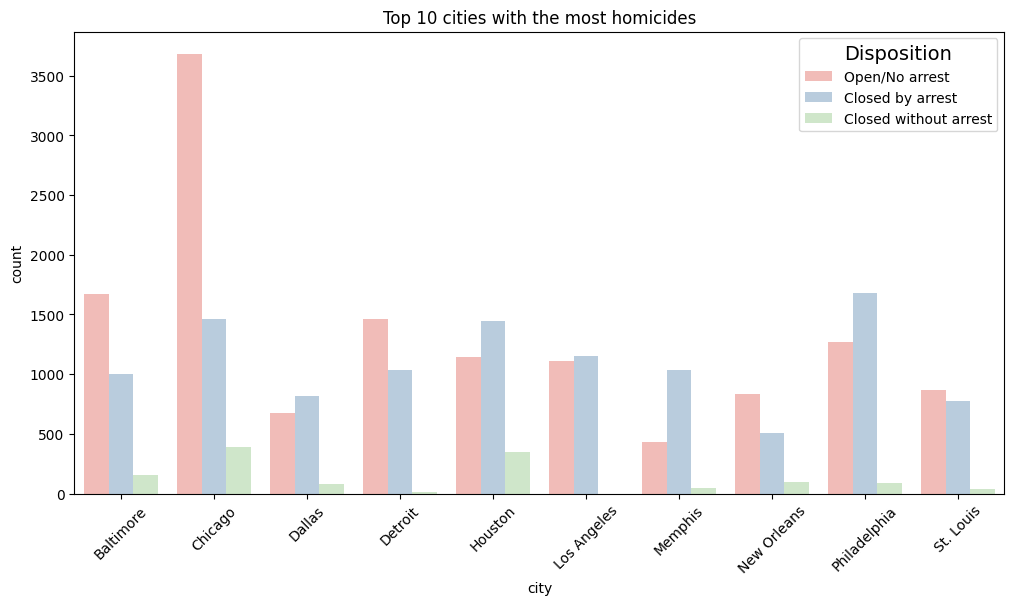

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the top 10 cities with the most homicides
top_10_cities = df['city'].value_counts().head(10).index

# Filter the DataFrame to include only data from the top 10 cities
df_top_10 = df[df['city'].isin(top_10_cities)]

# Create a countplot to visualize the relationship between 'disposition' and 'victim_race'
plt.figure(figsize=(12, 6))
sns.countplot(x='city', hue='disposition', data=df_top_10, palette= 'Pastel1')

# Customize the plot
plt.title('Top 10 cities with the most homicides')
plt.xlabel = 'City'
plt.ylabel = 'Count'
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='Disposition', title_fontsize='14')
plt.show()

-	Highest Homicide Cases: Chicago stands out as the city with the highest number of recorded homicide cases, reporting more than 3500 cases, followed by Philadelphia and Baltimore, with is over 2000 cases.
-	Disposition Insights: It's interesting to note that the highest number of cases closed by arrest is found in the same 3 cities, indicating that law enforcement has been effective in solving these cases in these states.


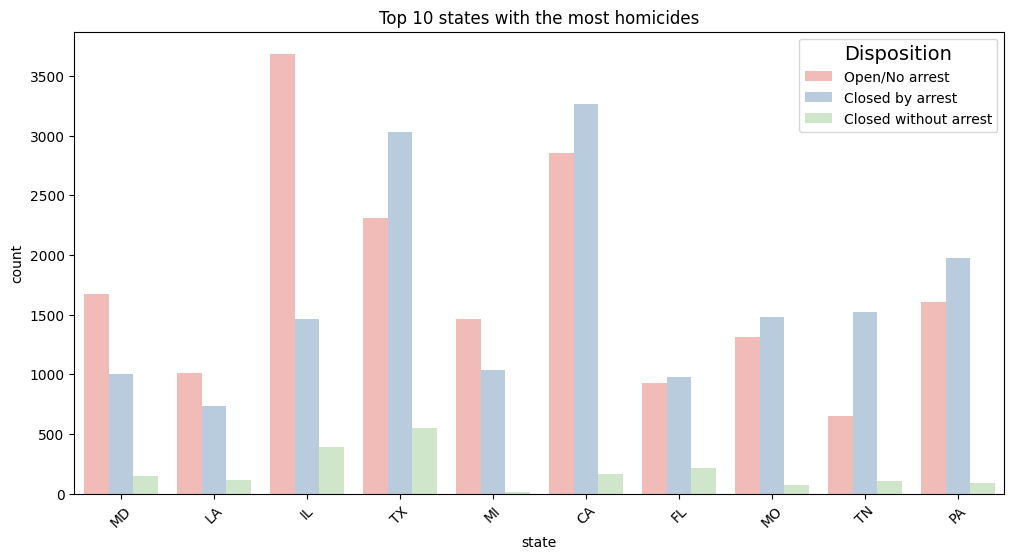

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the top 10 states with the most homicides
top_10_states = df['state'].value_counts().head(10).index

# Filter the DataFrame to include only data from the top 10 states
df_top_10_states = df[df['state'].isin(top_10_states)]

# Create a countplot to visualize the relationship between 'state' and 'disposition'
plt.figure(figsize=(12, 6))
sns.countplot(x='state', hue='disposition', data=df_top_10_states, palette='Pastel1')

# Customize the plot
plt.title('Top 10 states with the most homicides')
plt.xlabel = 'State'
plt.ylabel = 'Count'
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='Disposition', title_fontsize='14')
plt.show()


-	Highest Homicide Cases: California (CA) recorded the highest number of homicide cases among the 50 states, with more than 6,000 cases, followed by Texas (TX) and Illinois (IL) each with over 5,000 cases.
-	Disposition Insights: It's interesting to note that the highest number of cases closed by arrest is found in California, Texas, and Illinois, indicating that law enforcement has been effective in solving these cases in these states.
-	Illinois’ Unique Case Distribution: A noteworthy observation is that Illinois has a substantial number of cases that are open with no arrest. This is an important point because it suggests that Illinois might experience a shift in its ranking among states if these open cases are resolved. If these cases are solved, Illinois may have more homicides compared to California, which could change the current order of states in terms of the number of homicide cases.


# Pie Chart

***4. ‘What can be discerned about the demographics profiles of homicide victims?’***

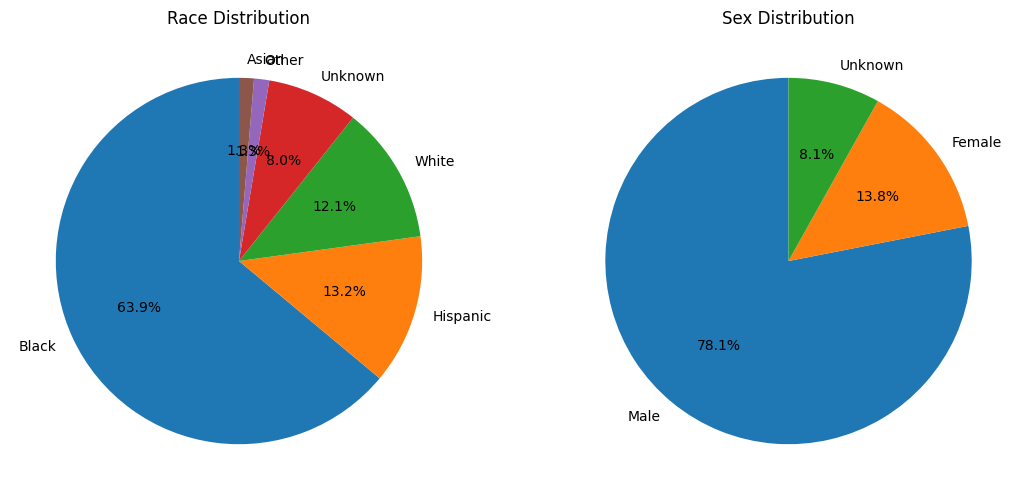

In [ ]:
race_counts = df['victim_race'].value_counts()
sex_counts = df['victim_sex'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(13, 7))

# victim_race pie graph
axs[0].pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Race Distribution')

# victim_sex pie graph
axs[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Sex Distribution')

plt.show()

Black is the dominant race when reported case are received, accounting for more than half of the races (63.9%), while Hispanic comes second and White in the 3rd place (13.2% and 12.1% respectively).

In terms of gender, male accounts for most of the cases, with 78.1% while female only comprises of 13.8% with 8.1% from Unknown genders.

# Histogram

The column "closed without arrest" includes cases where there is sufficient evidence to support a homicide charge, but an arrest is not possible. This can be due to a variety of reasons, such as the suspect's death, the suspect's flight from justice, or the suspect's lack of capacity to stand trial.

The column "closed with arrest" includes cases where the suspect has been arrested and charged with homicide. These cases are more likely to result in a conviction, but it is important to note that not all defendants who are charged with homicide are convicted.

The column "open no arrest" includes cases where the police have not yet identified or arrested a suspect. These cases may be open for a long time, and some may never be solved.

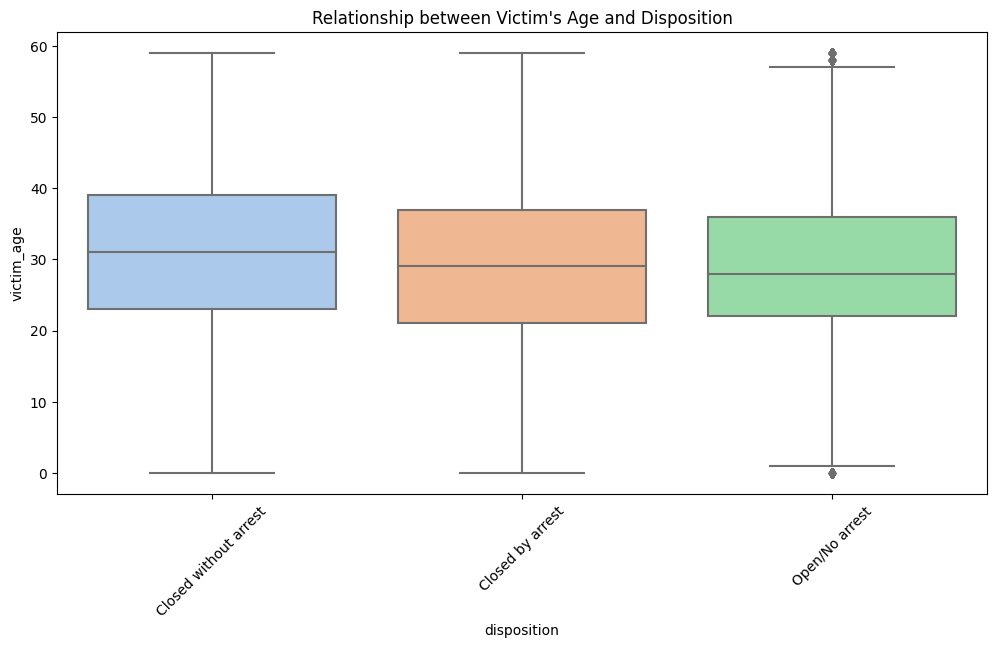

In [ ]:
# Relationship between Victim's Age and Disposition
plt.figure(figsize=(12, 6))
sns.boxplot(x='disposition', y=df_cleaned['victim_age'], data=df, palette = 'pastel')
plt.title("Relationship between Victim's Age and Disposition")
plt.xlabel = 'Disposition'
plt.ylabel = 'Age'
plt.xticks(rotation=45)
plt.show()


The box plot shows that there is a negative correlation between victim age and disposition. This means that younger victims are more likely to have a positive disposition, while older victims are more likely to have a negative disposition. Overall, the box plot suggests that younger victims are more likely to have a positive disposition than older victims. This is an important finding that can help to inform the development of victim support services.

**The distribution of Victim Age**

Age column has no outliers because there is no data points that fall beyond the whiskers are shown as individual points or small circles. The box in the plot represents the interquartile range (IQR), which is the middle 50% of the data. The longer the box, the greater the spread. 50% of the dataset for victims between 20 and 40. Median is around 28 (orange line)

<Figure size 1500x600 with 0 Axes>

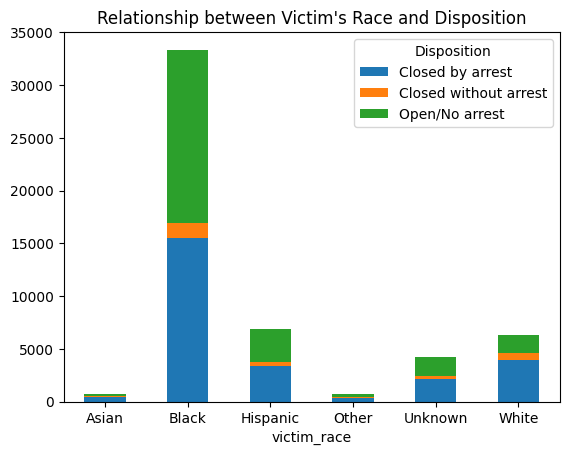

In [ ]:
# 5. Relationship between Victim's Race and Disposition
cross_table = pd.crosstab(df['victim_race'], df['disposition'])

plt.figure(figsize=(15, 6))
cross_table.plot(kind='bar', stacked=True)
plt.title("Relationship between Victim's Race and Disposition")
plt.xlabel= 'Race'
plt.ylabel = 'Count'
plt.xticks(rotation=0)
plt.legend(title='Disposition')
plt.show()

Overall, the graph shows that black victims are more likely to have their cases closed by arrest and less likely to have their cases closed without arrest than white victims. Hispanic victims are also more likely to have their cases closed by arrest and less likely to have their cases closed without arrest than white victims. Asian victims are the least likely to have their cases closed by arrest and the most likely to have their cases closed without arrest.

**5. ‘Are there potential correlations between victim ages and homicide’s location?’**

## Scatter Plot:

Create a scatter plot to visualize the relationships between two numerical columns. In this example, we'll create a scatter plot between columns 'A' and 'B'.

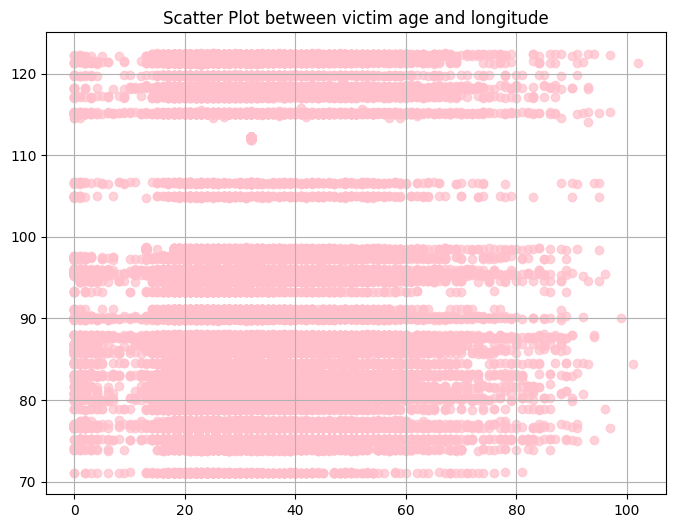

In [ ]:
#Example
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['victim_age'], df['lon'], alpha=0.7, color = 'pink')
plt.title('Scatter Plot between victim age and longitude')
plt.xlabel = 'Victim Age'
plt.ylabel = 'Longitude'
plt.grid(True)
plt.show()


The scatter plot illustrates the distribution of data points for victim age on the y-axis and latitude on the x-axis. It is evident that the data points are scattered across the plot without forming a clear, discernible pattern, which signifies that there is no correlation between victim age and latitude. This means changes in victim age do not correspond to systematic changes in latitude, and vice versa. This lack of correlation indicates that variations in victim age do not impact geographical location (latitude) or vice versa in a predictable manner

**Show therelationship between latitude and longitude**

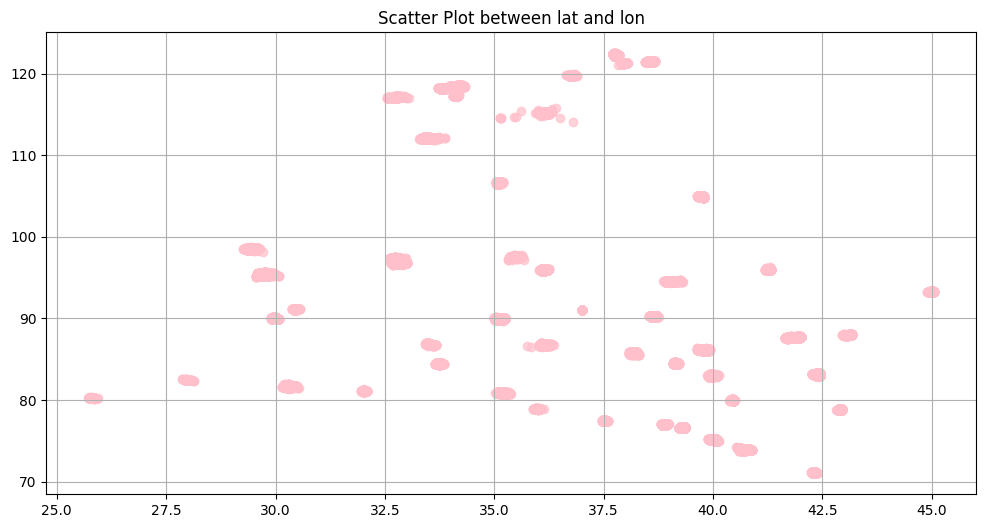

In [ ]:
#Scatter plot between lat and lon
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df['lat'], df['lon'], alpha=0.7, color = 'pink')
plt.title('Scatter Plot between lat and lon')
plt.xlabel = 'lat'
plt.ylabel = 'lon'
plt.grid(True)
plt.show()

The scatter plot visualizes the distribution of data points for latitude on the y-axis and longitude on the x-axis. While a trend is noticeable, with data points exhibiting some level of clustering, it's not a very strong or pronounced trend. The scatter of data points is not tightly clustered along a clear linear path; instead, they are more scattered and dispersed. This weak correlation indicates that, on average, as latitude values increase, longitude values tend to increase slightly, and as latitude values decrease, longitude values tend to decrease slightly, but the relationship is not strong

## Histogram:

**Show the distribution of monthly reported case**

***6. ‘Are there a seasonal pattern of homicides incident within a year?’***

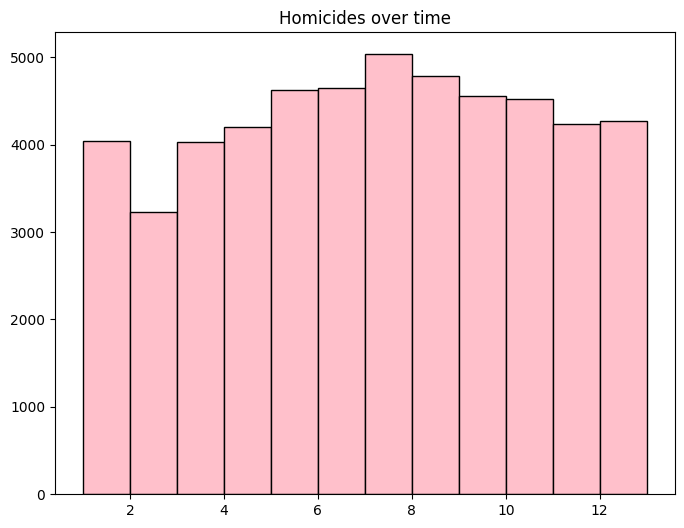

In [ ]:
# Create a histogram
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(df["reported_month"], bins=12, range=(1, 13), color='pink', edgecolor='black')
plt.xlabel = 'reported_month'
plt.ylabel = 'Frequency'
plt.title('Homicides over time')

# Show the plot
plt.show()

The peak of histogram when cases were reveals over a 12-month period, with the highest levels observed in July, August, and June. This pattern suggests a seasonal variation in homicide rates, with these summer months experiencing a disproportionately higher number of reported cases compared to other months. The reasons for this seasonality could be multifaceted, including factors such as increased outdoor activities, higher temperatures, and potential social and environmental factors that may contribute to heightened tensions and violence during the summer months.

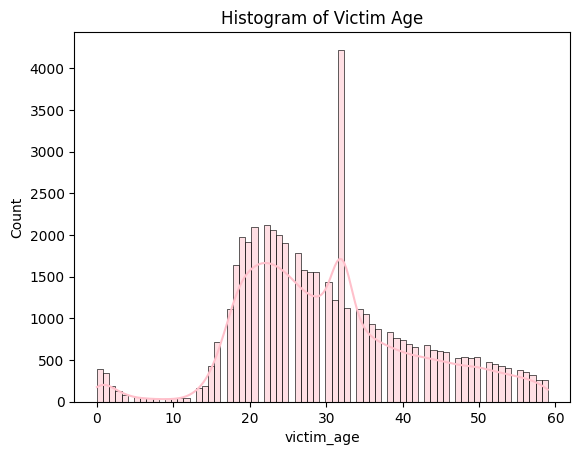

In [ ]:

# Define the variable victim_age
victim_age = df_cleaned['victim_age']

# Create histogram
sns.histplot(victim_age, kde=True, color = 'pink')
plt.title('Histogram of Victim Age')

# Show the plot
plt.show()


The histogram of victim age shows the most recoded ages are around the twenties and gradually decline as the victims got older.

# Correlation Heatmap:

A correlation value is a summary statistic that quantifies the strength and direction of the linear relationship between two variables. It falls within the range of -1 to 1, where:

*  A positive correlation value (r > 0) indicates a positive linear relationship, meaning that as one variable increases, the other tends to increase as well, and the closer r is to +1, the stronger the positive relationship.
*   A negative correlation value (r < 0) indicates a negative linear relationship, meaning that as one variable increases, the other tends to decrease, and the closer r is to -1, the stronger the negative relationship
*   A correlation value of 0 (r = 0) suggests no linear relationship between the two variables.

***7. ‘Show-an-overview-about-the-relationships-of-numerical-attributes-in-the-dataset’***

**Show an overview about the relatinships in the datasets**

<ipython-input-90-87ffcfb7eb21>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


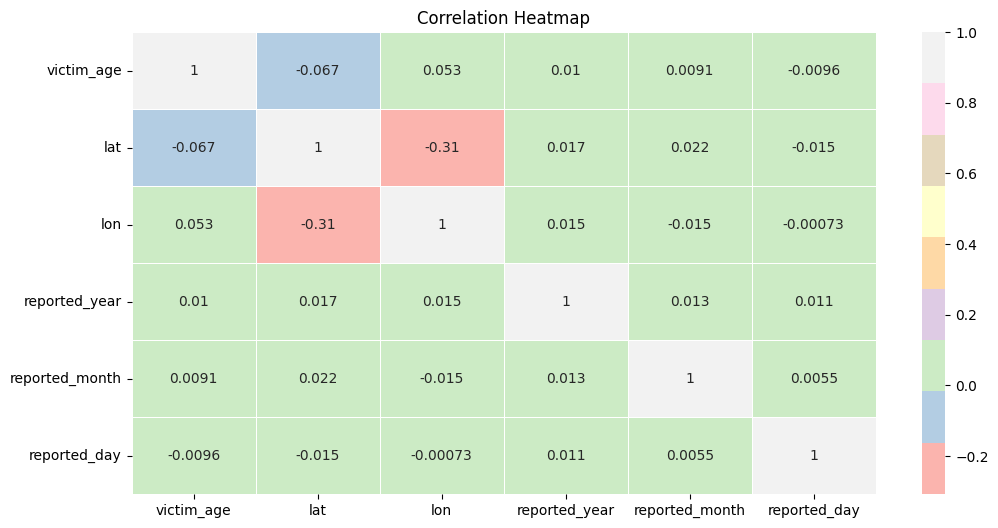

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation =0)
plt.show()

-	Lat and Lon (-0.31): The negative correlation of 0.31 between latitude (lat) and longitude (lon) suggests that there is a moderately negative relationship between these two geographic coordinates. This means that, in the dataset, as latitude values increase, longitude values tend to decrease, and vice versa. This correlation could indicate some spatial or geographic pattern in my data.
-	Other Correlations (< 0.05): The correlations between the remaining attributes (victim age, reported year, reported month, and reported date) are all less than 0.05. These low correlation values suggest that there is little to no linear relationship between these attributes. In other words, changes in one attribute do not significantly impact changes in the other attributes in a linear fashion.
-	Lowest Correlation (-0.067): The relationship between victim age and latitude with the lowest correlation is negative, which suggests that there is a very weak negative relationship between these two attributes. This means that as latitude values increase, victim age tends to slightly decrease, and as latitude values decrease, victim age tends to slightly increase. However, the correlation is quite low at -0.067, indicating that there is little to no meaningful linear relationship between these two attributes.

Overall, the correlation shows no relationships of the numerical attributes. It shows that the strongest linear relationship exists between latitude and longitude, with a negative correlation. The other attributes (victim age, reported year, reported month, reported date) do not exhibit strong linear relationships with one another.
